# Import Libraries

### Pandas
### Seaborn
### Numpy
### Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read CSV File (Dataset)

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Lasso Regreesion/Lasso_Regression DataSet.csv")
df.head()

,age,years_experience,education_level,project_count,technical_score,certifications,salary
0,50,28.1,3,6,5.43,1,92716.36
1,36,15.5,1,7,6.18,4,70383.92
2,29,5.1,3,9,8.66,2,58425.67
3,42,18.2,2,1,7.74,2,69599.44
4,40,17.6,2,7,5.64,1,71603.78


### Convert Years_experience & Salary decimal number into Integer Number
We Don't need decimal Number in these columns

In [3]:
df["years_experience"] = pd.to_numeric(df["years_experience"]).astype(int)
df["salary"] = pd.to_numeric(df["salary"]).astype(int)


### Check it sucessfully Conversion

In [4]:
df.head()

,age,years_experience,education_level,project_count,technical_score,certifications,salary
0,50,28,3,6,5.43,1,92716
1,36,15,1,7,6.18,4,70383
2,29,5,3,9,8.66,2,58425
3,42,18,2,1,7.74,2,69599
4,40,17,2,7,5.64,1,71603


### Check the Null Value

In [5]:
df.isnull().sum()

age                 0
years_experience    0
education_level     0
project_count       0
technical_score     0
certifications      0
salary              0
dtype: int64

### Check statistical summary

In [6]:
df.describe()

,age,years_experience,education_level,project_count,technical_score,certifications,salary
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,41.322000,19.894000,1.910000,5.002000,7.484760,2.018000,79191.050000
std,11.051633,11.125931,0.706327,2.492875,1.456307,1.428902,22608.275716
min,22.000000,0.000000,1.000000,1.000000,5.000000,0.000000,30902.000000
25%,32.000000,11.000000,1.000000,3.000000,6.197500,1.000000,60723.000000
50%,43.000000,21.000000,2.000000,5.000000,7.460000,2.000000,81293.500000
75%,51.000000,29.000000,2.000000,7.000000,8.750000,3.000000,98059.500000
max,59.000000,40.000000,3.000000,9.000000,10.000000,4.000000,124454.000000


### Check About dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               500 non-null    int64  
 1   years_experience  500 non-null    int64  
 2   education_level   500 non-null    int64  
 3   project_count     500 non-null    int64  
 4   technical_score   500 non-null    float64
 5   certifications    500 non-null    int64  
 6   salary            500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


### Check Relationship between the columns throuth pair plot

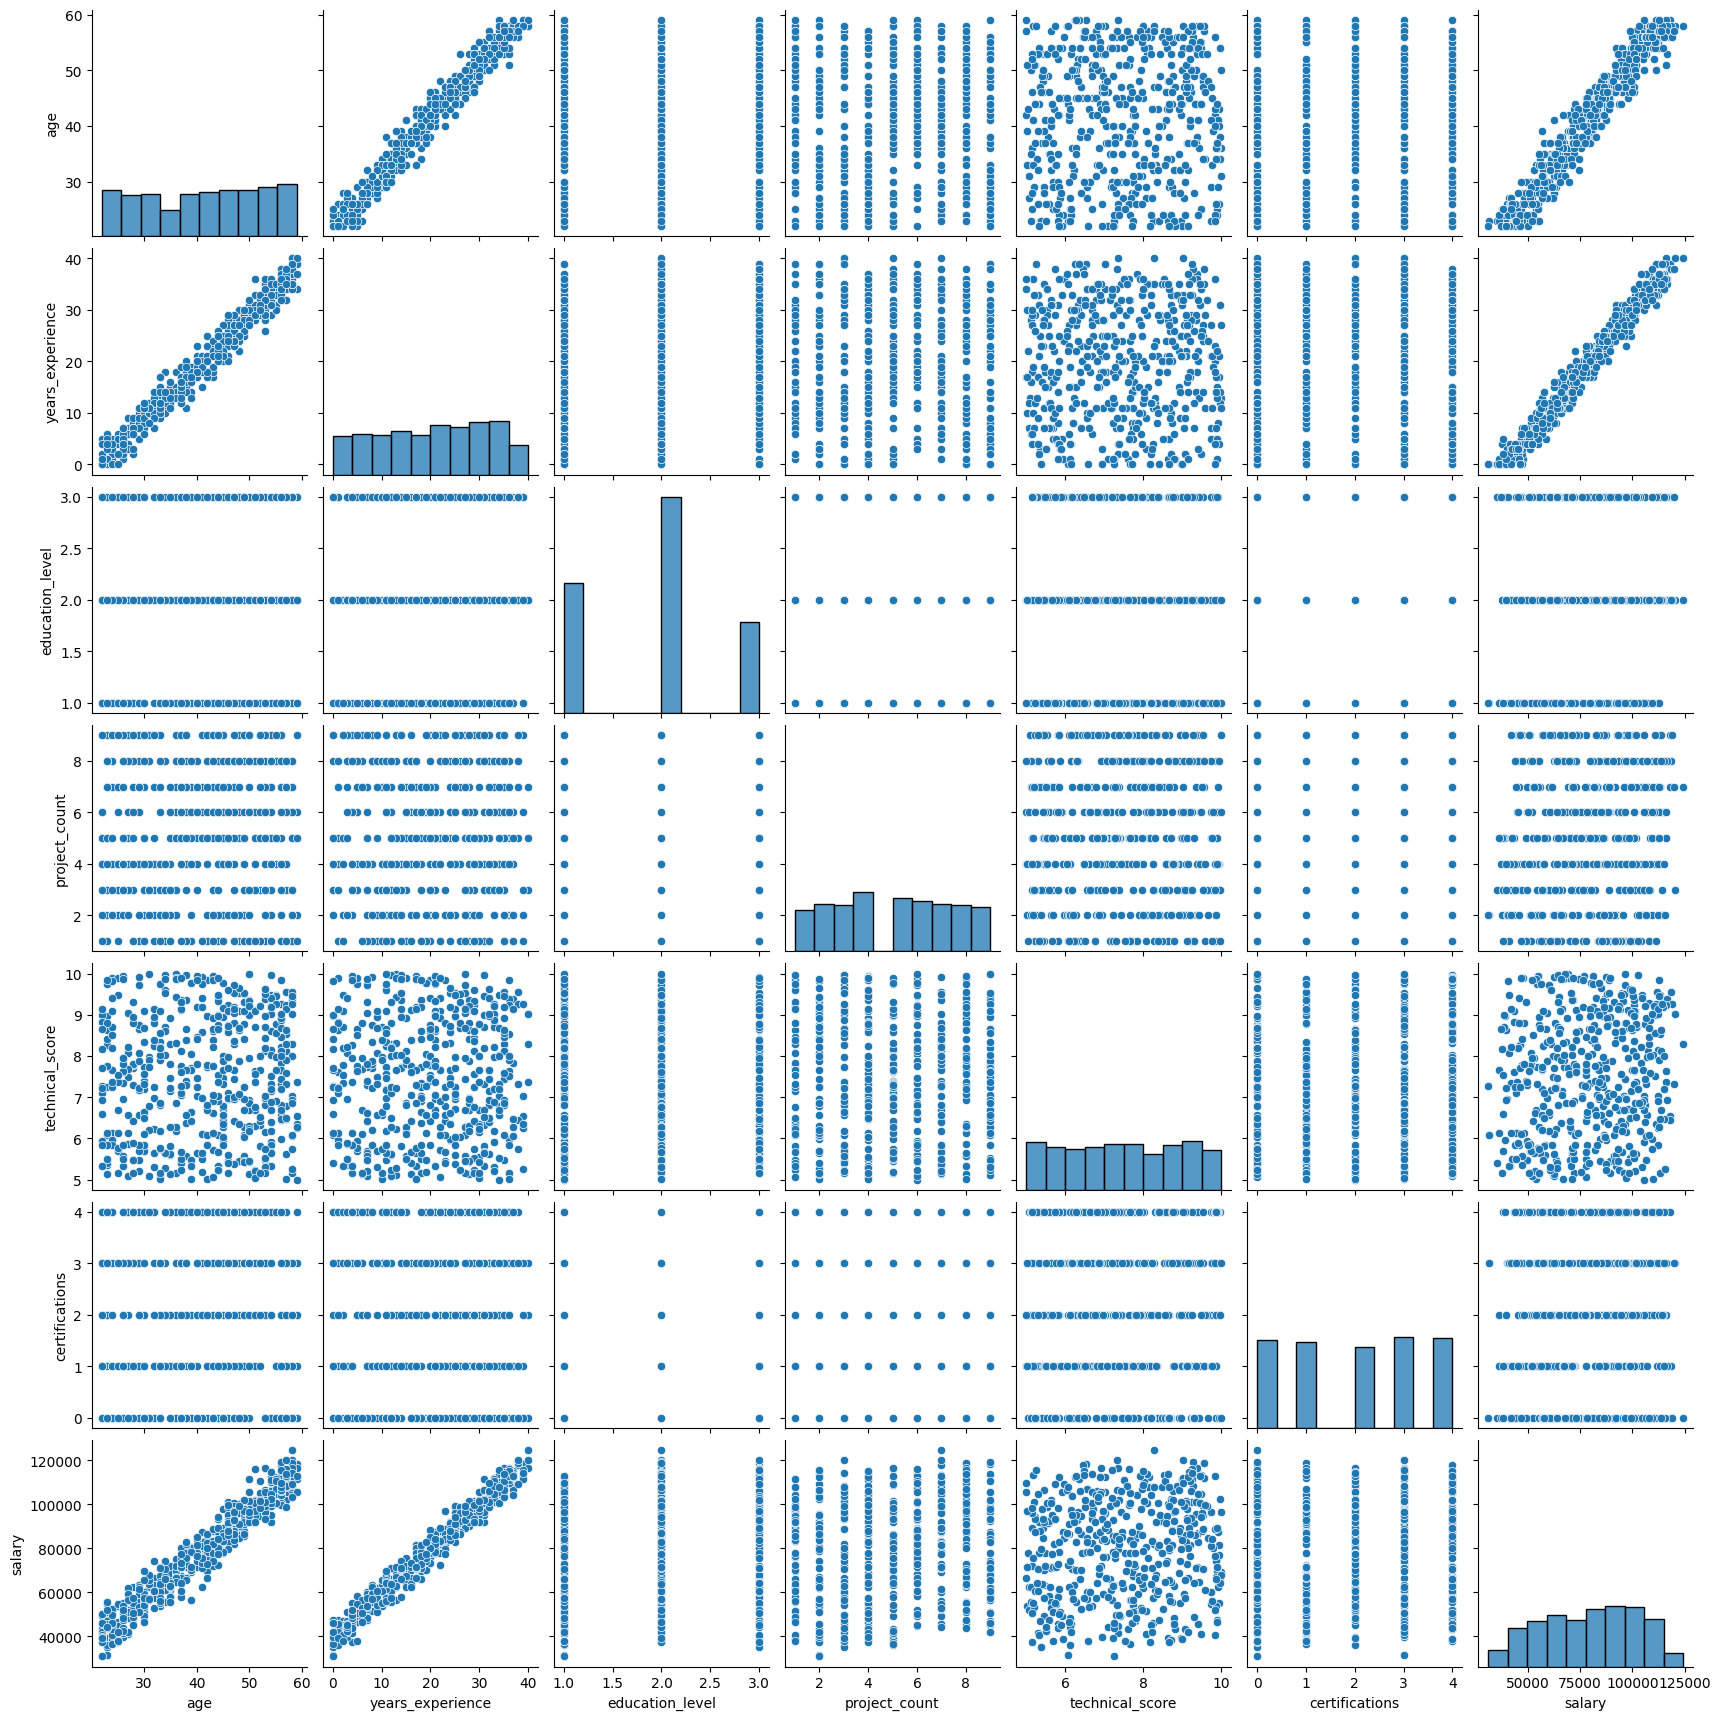

In [8]:
sns.pairplot(data=df)
plt.show()

### Check co-relation between the columns

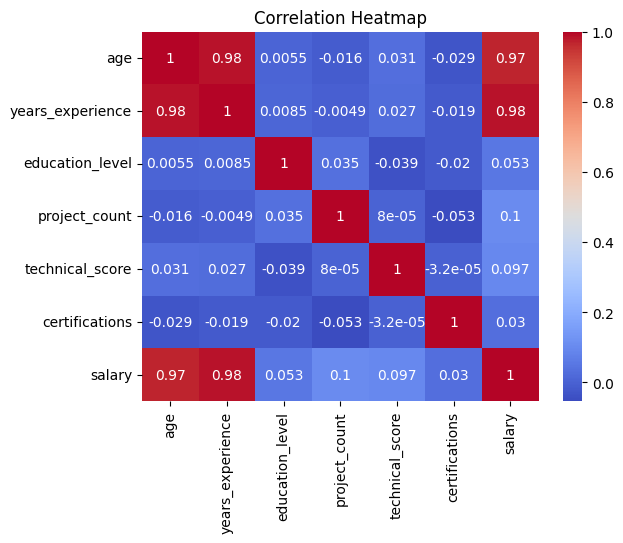

In [9]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Split the data in X and Y dependent variable or Independent Variable

In [10]:
x=df.iloc[:,:-1]
y=df[["salary"]]

### Import StandardScaler for Scalling the Data

In [11]:
from sklearn.preprocessing import StandardScaler

### Apply StandardScaler or fit the standardScalar 

In [12]:
ss = StandardScaler()
x_scaled = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

### Check it , the dataset is scaled or not (Our Dataset now in scalling form) it is best step to improve our model performance)

In [13]:
x_scaled.head()

,age,years_experience,education_level,project_count,technical_score,certifications
0,0.786010,0.729298,1.544740,0.400742,-1.412352,-0.713149
1,-0.482040,-0.440314,-1.289645,0.802287,-0.896835,1.388469
2,-1.116065,-1.340015,1.544740,1.605377,0.807808,-0.012610
3,0.061410,-0.170403,0.127547,-1.606983,0.175441,-0.012610
4,-0.119740,-0.260374,0.127547,0.802287,-1.268007,-0.713149


### Import Train_Test_Split to split the data in the training or testing

In [14]:
from sklearn.model_selection import train_test_split

### Split the data in the training or testing

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

### Import Lasso Regression Model From Sklearn 

from sklearn.linear_model import Lasso

In [16]:
from sklearn.linear_model import Lasso

### Fit the model / Apply the Model

In [17]:
la=Lasso(alpha=0.1)
la.fit(x_train,y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


### Check the score (accuary) for checking the overfitting scenario

In [18]:
la.score(x_test,y_test)*100 , la.score(x_train,y_train)*100

(99.24565757365986, 99.12834555048141)

### Predict the future value

In [19]:
df["Prediction"] = la.predict(x)
df.head()

,age,years_experience,education_level,project_count,technical_score,certifications,salary,Prediction
0,50,28,3,6,5.43,1,92716,738992.991409
1,36,15,1,7,6.18,4,70383,454101.128802
2,29,5,3,9,8.66,2,58425,240390.093315
3,42,18,2,1,7.74,2,69599,508147.943927
4,40,17,2,7,5.64,1,71603,495691.549160


### Import metrics for check the performance of our model

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Check the metrics For Performance of our Model

In [21]:

y_pred = la.predict(x_test)

mae = mean_absolute_error(y_test, y_pred) *100
mse = mean_squared_error(y_test, y_pred) *100
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)*100

print(f"📉 MAE (Mean Absolute Error): {mae:.2f}")
print(f"📉 MSE (Mean Squared Error): {mse:.2f}")
print(f"📉 RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"🎯 R² Score: {r2:.2f}")


📉 MAE (Mean Absolute Error): 161029.11
📉 MSE (Mean Squared Error): 402961660.02
📉 RMSE (Root Mean Squared Error): 20073.90
🎯 R² Score: 99.25


### Check Our Model Performance Through Graphs
   Prediction between the years_experience & Salary

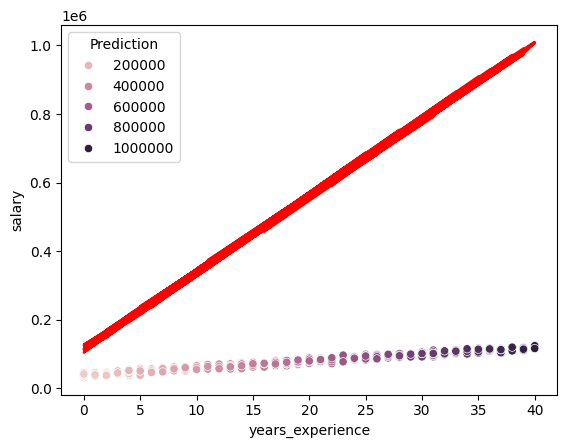

In [22]:
sns.scatterplot(x="years_experience",y="salary",hue="Prediction",data=df)
plt.plot(df["years_experience"], df["Prediction"], color="r", label="Regression Line")
plt.show()


### Check Our Model Performance Through Graphs
   Prediction between the years_experience & Salary or Age

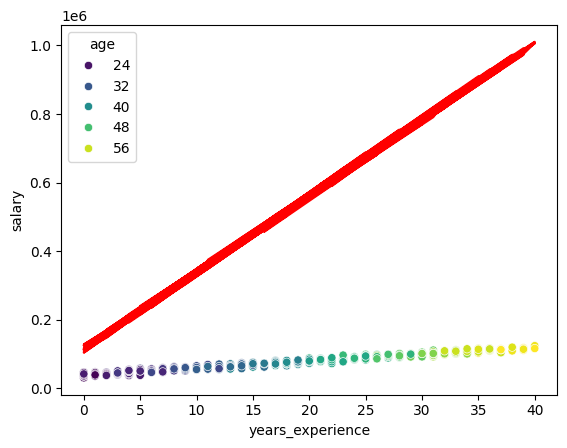

In [23]:
sns.scatterplot(x="years_experience",y="salary",hue="age",data=df, palette="viridis")
plt.plot(df["years_experience"], df["Prediction"], color="r", label="Regression Line")
plt.show()


### Check Our Model Performance Through Graphs
   Prediction between the age & Salary

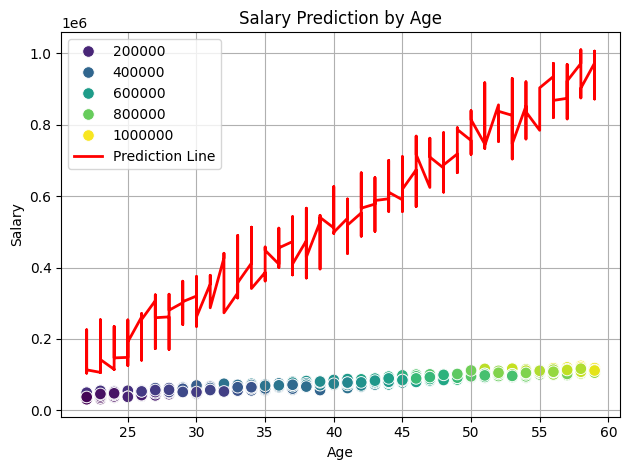

In [24]:
df_sorted = df.sort_values(by="age")
sns.scatterplot(x="age", y="salary", hue="Prediction", palette="viridis", data=df_sorted, s=70)
plt.plot(df_sorted["age"], df_sorted["Prediction"], color="red", linewidth=2, label="Prediction Line")
plt.title("Salary Prediction by Age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Certifications vs Salary

C:\Users\zabiz\AppData\Local\Temp\ipykernel_16080\3483142950.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="certifications",y="salary",data=df, palette="viridis")


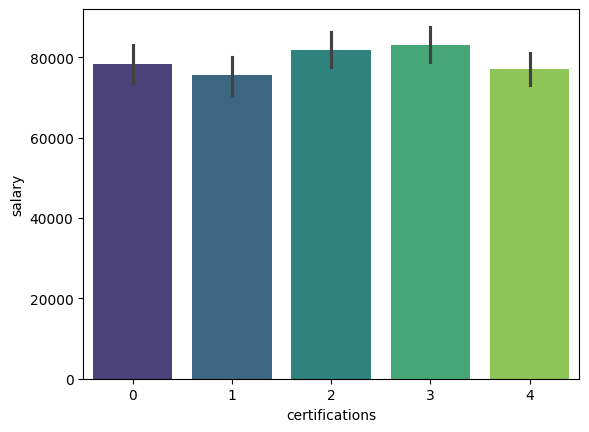

In [25]:
sns.barplot(x="certifications",y="salary",data=df, palette="viridis")
plt.show()


### Certifications vs Prediction

C:\Users\zabiz\AppData\Local\Temp\ipykernel_16080\1270408116.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="certifications",y="Prediction",data=df, palette="icefire")


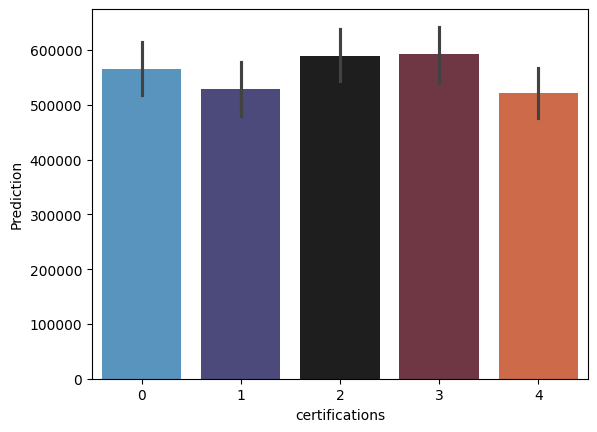

In [26]:
sns.barplot(x="certifications",y="Prediction",data=df, palette="icefire")
plt.show()


### education_level vs Salary

C:\Users\zabiz\AppData\Local\Temp\ipykernel_16080\3821289216.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="education_level",y="salary",data=df, palette="viridis")


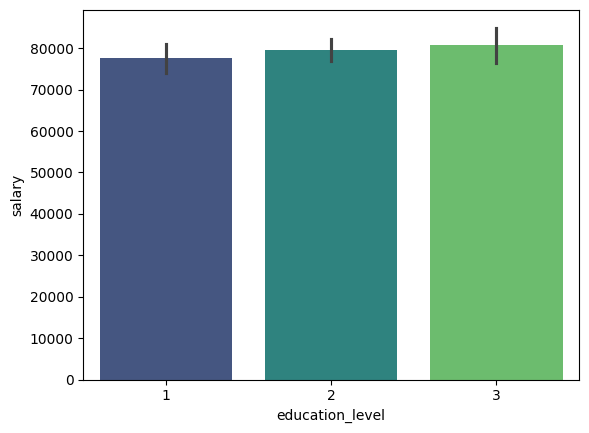

In [27]:
sns.barplot(x="education_level",y="salary",data=df, palette="viridis")
plt.show()


### education_level vs prediction

C:\Users\zabiz\AppData\Local\Temp\ipykernel_16080\293147069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="education_level",y="Prediction",data=df, palette="icefire")


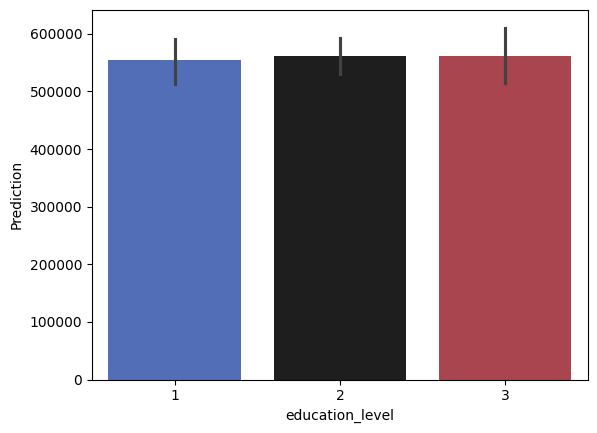

In [28]:
sns.barplot(x="education_level",y="Prediction",data=df, palette="icefire")
plt.show()


###  project_count vs Salary

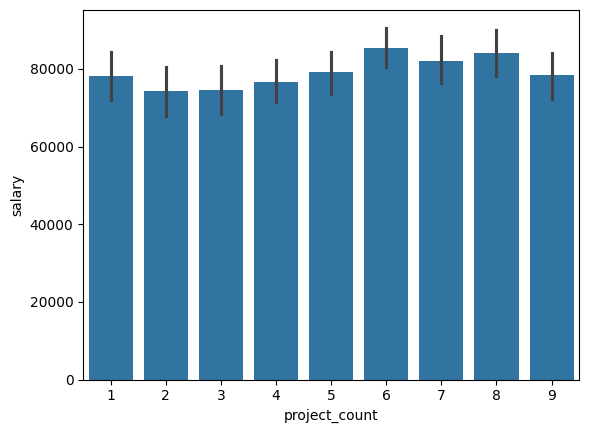

In [29]:
sns.barplot(x="project_count",y="salary",data=df)
plt.show()


###  project_count vs Prediction

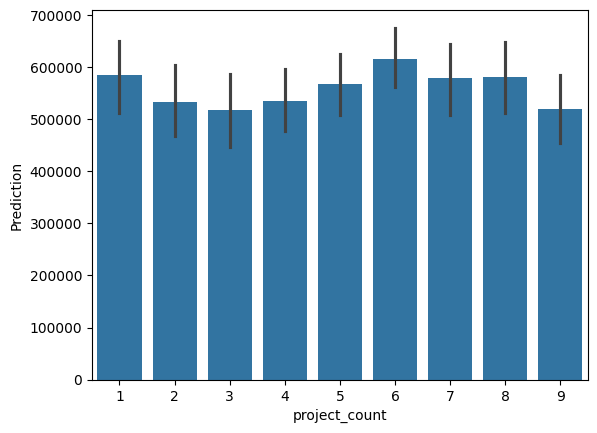

In [30]:
sns.barplot(x="project_count",y="Prediction",data=df)
plt.show()


# 📌 Conclusion

In this project, we successfully implemented **Lasso Regression** using Python and Scikit-learn to predict **salary based on years of experience**.  
Lasso (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that adds an **L1 regularization penalty** to reduce model complexity and prevent overfitting.

After converting floating-point values into integers for simplicity, we loaded and processed the dataset to train the Lasso model.

---

## 💡 Key Takeaways

✅ **Feature Selection**:  
Lasso helps in automatic feature selection by shrinking less important feature coefficients to zero.  
Though this dataset had only one feature (`YearsExperience`), Lasso still proved useful in minimizing complexity.

📉 **Regularization Impact**:  
Unlike standard linear regression, Lasso adds an L1 penalty, which helps in **controlling overfitting** and enhances the model's generalization ability.

📊 **Visualization**:  
We plotted the regression line alongside the actual data points, showing a **strong linear relationship** between experience and salary.

📈 **Model Performance**: 
    
 The model's predictions were very close to actual values.  
  We evaluated it using standard metrics like:
- ✅ Mean Absolute Error (MAE)
- ✅ Mean Squared Error (MSE)
- ✅ R² Score  

These confirm the model's reliability and predictive strength.

---

## 🎯 Why This Project Matters

- It showcases how **Lasso Regression** simplifies models by eliminating less impactful features — a crucial benefit in multivariate scenarios.
- This hands-on project forms a **strong foundation in regularization**, essential for advanced machine learning workflows.
- It’s **clean, educational, and scalable** — making it a valuable addition to your portfolio.

🌟 **Great job on mastering the concept of regularized regression!**
# 📌 Conclusion

In this project, we successfully implemented **Lasso Regression** using Python and Scikit-learn to predict **salary based on years of experience**.  
Lasso (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that adds an **L1 regularization penalty** to reduce model complexity and prevent overfitting.

After converting floating-point values into integers for simplicity, we loaded and processed the dataset to train the Lasso model.

---

## 💡 Key Takeaways

✅ **Feature Selection**:  
Lasso helps in automatic feature selection by shrinking less important feature coefficients to zero.  
Though this dataset had only one feature (`YearsExperience`), Lasso still proved useful in minimizing complexity.

📉 **Regularization Impact**:  
Unlike standard linear regression, Lasso adds an L1 penalty, which helps in **controlling overfitting** and enhances the model's generalization ability.

📊 **Visualization**:  
We plotted the regression line alongside the actual data points, showing a **strong linear relationship** between experience and salary.

📈 **Model Performance**:  
The model's predictions were very close to actual values.  
We evaluated it using standard metrics like:
- ✅ Mean Absolute Error (MAE)
- ✅ Mean Squared Error (MSE)
- ✅ R² Score  

These confirm the model's reliability and predictive strength.

---

## 🎯 Why This Project Matters

- It showcases how **Lasso Regression** simplifies models by eliminating less impactful features — a crucial benefit in multivariate scenarios.
- This hands-on project forms a **strong foundation in regularization**, essential for advanced machine learning workflows.
- It’s **clean, educational, and scalable** — making it a valuable addition to your portfolio.

🌟 **Great job on mastering the concept of regularized regression!**
